In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from seastar.seastar.gmfs.doppler import *
from seastar.seastar.oscar.oscar import *


In [2]:
#for_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_33_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_34_pres_1_fdc_auto.sar.nc"
#aft_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_77_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_78_pres_1_fdc_auto.sar.nc"
for_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_Sept_19_2022\SAR_CPLX_20220517T093239_13.5G_VV_33_pres_1_fdc_auto.sar.sig_INF_SAR_CPLX_20220517T093239_13.5G_VV_34_pres_1_fdc_auto.sar.sig.nc"
aft_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_Sept_19_2022\SAR_CPLX_20220517T093239_13.5G_VV_77_pres_1_fdc_auto.sar.sig_INF_SAR_CPLX_20220517T093239_13.5G_VV_78_pres_1_fdc_auto.sar.sig.nc"


#mid_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_00_pres_1_fdc_auto.sar.nc"
#dsm = xr.open_dataset(mid_file, mask_and_scale=True)
dsf = xr.open_dataset(for_file, mask_and_scale=True)
dsa = xr.open_dataset(aft_file, mask_and_scale=True)

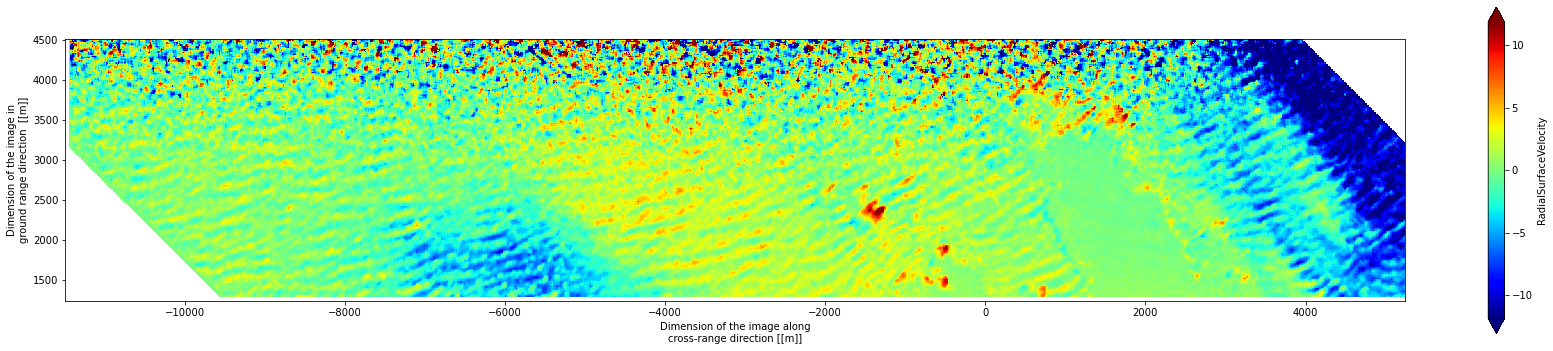

In [3]:
dsa=add_central_electromagnetic_wavenumber(dsa)
dsa=compute_SLC_Master_Slave(dsa)
dsa=compute_multilooking_Master_Slave(dsa, window=7)
dsa=add_antenna_baseline(dsa)
dsa=compute_SLC_Master_Slave(dsa)
dsa=compute_multilooking_Master_Slave(dsa, window=7)
dsa=compute_incidence_angle(dsa)
dsa=compute_antenna_azimuth_direction(dsa,antenna='aft')
dsa=compute_time_lag_Master_Slave(dsa)
compute_radial_surface_velocity(dsa)
ax = dsa.RadialSurfaceVelocity.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,
ax.axes.set_aspect('equal')


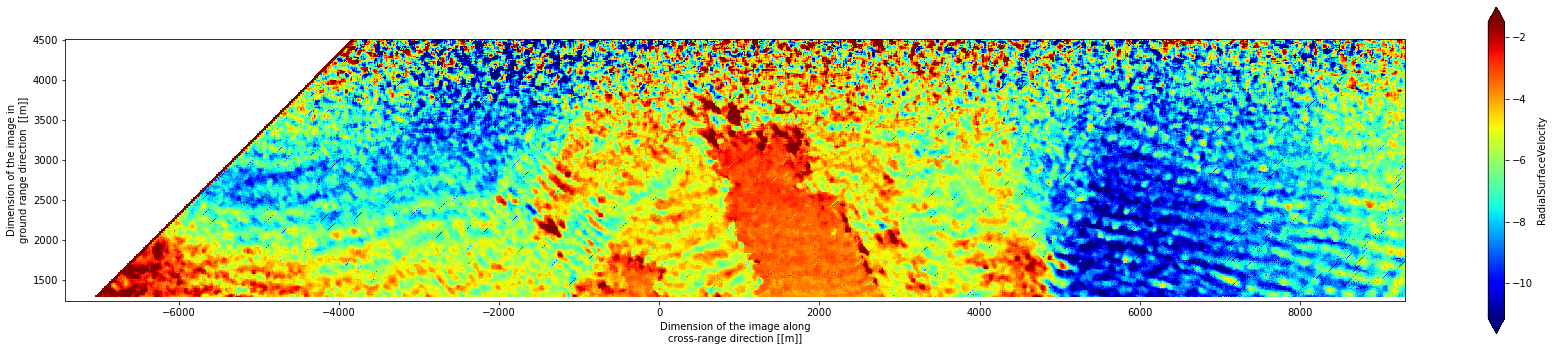

In [4]:
dsf=add_central_electromagnetic_wavenumber(dsf)
dsf=compute_SLC_Master_Slave(dsf)
dsf=compute_multilooking_Master_Slave(dsf, window=7)
dsf=add_antenna_baseline(dsf)
dsf=compute_SLC_Master_Slave(dsf)
dsf=compute_multilooking_Master_Slave(dsf, window=7)
dsf=compute_incidence_angle(dsf)
dsf=compute_antenna_azimuth_direction(dsf,antenna='aft')
#dsf=compute_time_lag_Master_Slave(dsf,options='from_aircraft_velocity')
dsf=compute_time_lag_Master_Slave(dsf,options='from_SAR_time')
#dsf=compute_radial_surface_velocity(dsf,options='from_aircraft_velocity')
dsf=compute_radial_surface_velocity(dsf,options='from_SAR_time')
ax = dsf.RadialSurfaceVelocity.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,
ax.axes.set_aspect('equal')

In [ ]:
dsf.RadialSurfaceVelocity

In [ ]:
antenna_angle=90
current_magnitude=np.sqrt(dsf.RadialSurfaceVelocity**2 + dsa.RadialSurfaceVelocity**2)
dum=(dsf.RadialSurfaceVelocity + dsa.RadialSurfaceVelocity)
dum

In [ ]:
ind_pos  =  (dsf.RadialSurfaceVelocity >  dsa.RadialSurfaceVelocity) * np.cos(np.radians(antenna_angle))



tmp_dir = xr.DataArray(np.zeros(current_magnitude.shape), coords=[dsf.CrossRange, dsf.GroundRange], dims=('CrossRange','GroundRange'))
#tmp_dir = tmp_dir.where(ind_pos, np.degrees(np.arccos(dsf.RadialSurfaceVelocity/current_magnitude)),
                       # -np.degrees(np.arccos(dsf.RadialSurfaceVelocity/current_magnitude)))
tmp_dir

In [ ]:
#def compute_surface_current_vectors(fore, aft)


  # tmp_x =  dsf.RadialSurfaceVelocity
  # tmp_y =  aft.surf_current
#antenna_angle=90
#antenna_angle   =  np.mod(dsf.AntennaAzimuthImage - dsa.AntennaAzimuthImage, 360) # angle between the two antenna (close to pi/2)
#   current_magnitude  =  np.sqrt( (tmp_x.^2 + tmp_y.^2 - 2*tmp_x.*tmp_y.*cosd(ouverture) )./sind(ouverture).^2 );
#current_magnitude=np.sqrt(dsf.RadialSurfaceVelocity**2 + dsa.RadialSurfaceVelocity**2)
    
#current_magnitude=np.sqrt(dsf.RadialSurfaceVelocity**2 + dsa.RadialSurfaceVelocity**2 
#                             -2*dsf.RadialSurfaceVelocity*dsa.RadialSurfaceVelocity*
#                             np.cos(np.radians(antenna_angle))/np.sin(np.radians(antenna_angle)**2))
  # % direction in antennas coordinate, trigonometric direction
ind_pos  =  (dsf.RadialSurfaceVelocity >  dsa.RadialSurfaceVelocity) * np.cos(np.radians(antenna_angle))

tmp_dir = tmp_dir.where(ind_pos, np.degrees(np.arccos(dsf.RadialSurfaceVelocity/current_magnitude)),
                        -np.degrees(np.arccos(dsf.RadialSurfaceVelocity/current_magnitude)))
#tmp_dir  =  np.zeros();
 #  tmp_dir( ind_pos) =     acosd(tmp_x( ind_pos)./tmp_tot( ind_pos));
  # tmp_dir(~ind_pos) =   - acosd(tmp_x(~ind_pos)./tmp_tot(~ind_pos));
  # % direction in antennas coordinate, oceanographic direction
  # tmp_dir1 =  -tmp_dir;
  # % direction in oceanographic coordinate
  # map.cdir  =  mod( fore.azi +  tmp_dir1, 360);
  # map.cvel   =  tmp_tot;
  # [map.c_u, map.c_v] = current_vel_dir_to_u_v( map.cvel,  map.cdir );
    
   # return u,v
 

In [ ]:
print(dsf.RadialSurfaceVelocity.shape)
print(dsa.RadialSurfaceVelocity.shape)

print(ind_pos.shape)

In [ ]:
u_1 = dsf.RadialSurfaceVelocity * (np.cos(np.radians(dsf.AntennaAzimuthImage))) # u component from fore antenna
v_1 = dsf.RadialSurfaceVelocity * (np.sin(np.radians(dsf.AntennaAzimuthImage))) # v component from fore antenna
u_2 = dsa.RadialSurfaceVelocity * (np.cos(np.radians(dsa.AntennaAzimuthImage))) # u component from aft antenna
v_2 = dsa.RadialSurfaceVelocity * (np.sin(np.radians(dsa.AntennaAzimuthImage))) # v component from aft antenna

u = u_1 + u_2 # u component of surface current
v = v_1 + v_2 # v component of surface current
X, Y = np.meshgrid(dsf.CrossRange, dsf.GroundRange, indexing='ij')
plot_i=1
plt.quiver(Y[::plot_i, ::plot_i], X[::plot_i, ::plot_i], u[::plot_i, ::plot_i], v[::plot_i, ::plot_i])

In [ ]:
v_1.shape